In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from numpy.random import multinomial

def bootstrap(series, n: int=1000):
    samples = multinomial(series.sum(), series/series.sum(), n)
    return samples / series.sum()

In [3]:
import math

def cohens_d(d1, d2):
    
    n1 = len(d1)
    n2 = len(d2)

    s1 = (
        ((d1-d1.mean())**2).sum() /
        (n1-1)
    )

    s2 = (
        ((d2-d2.mean())**2).sum() /
        (n2-1)
    )

    s = math.sqrt(
        ((n1-1)*s1 + (n2-1)*s2) /
        (n1+n2-2)
    )

    return (d1.mean() - d2.mean()) / s

In [41]:
import numpy as np

from lint.models import Token

def score_movement(s1, s2):
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    ds = []
    for c1, c2 in zip(b1.T, b2.T):
        ds.append(abs(cohens_d(c1, c2)))
        
    return max(ds)

In [42]:
from joblib import Memory

from lint.models import Token

mem = Memory('cache')

token_counts = mem.cache(Token.token_counts)

tokens = token_counts(10000)

In [43]:
year1a = 1840
year1b = 1860
year2a = 1980
year2b = 2000

min_count = 10000

data = []
for token, count in list(tokens.items())[:1000]:
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    if s1.sum() > min_count and s2.sum() > min_count:
        data.append((token, count, score_movement(s1, s2)))

In [44]:
import pandas as pd

df = pd.DataFrame(data, columns=('token', 'count', 'cohensd'))

df.sort_values('cohensd', ascending=False, inplace=True)

In [45]:
pd.set_option('display.max_rows', 1000)

df.head(100)

,token,count,cohensd
13,her,20550391,54.375724
5,i,32831159,53.307141
11,you,21824060,52.257827
7,he,30105265,47.121960
15,had,17170770,46.549011
48,,5554106,43.751648
69,its,3539001,41.846042
14,she,18628721,41.777892
283,end,718363,41.143191
12,his,21304626,37.075033


In [48]:
def plot_movement(
    token: str,
    year1a: int=1840,
    year1b: int=1860,
    year2a: int=1980,
    year2b: int=2000,
):
    
    s1 = Token.token_series(token, year1=year1a, year2=year1b)
    s2 = Token.token_series(token, year1=year2a, year2=year2b)
    
    b1 = bootstrap(s1)
    b2 = bootstrap(s2)
    
    plt.figure(figsize=(3,3))
    plt.ylim([0, 0.02])

    plt.plot(b1.mean(0))

    plt.fill_between(
        range(100),
        b1.mean(0) + 2*b1.std(0),
        b1.mean(0) - 2*b1.std(0),
        color='black',
        alpha=0.1,
    )

    plt.plot(b2.mean(0))

    plt.fill_between(
        range(100),
        b2.mean(0) + 2*b2.std(0),
        b2.mean(0) - 2*b2.std(0),
        color='black',
        alpha=0.1,
    )

    print(token)
    plt.show()

her


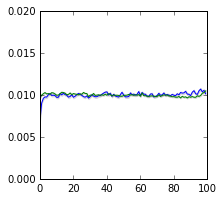

i


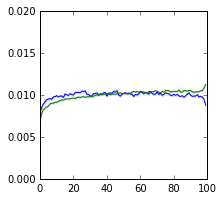

you


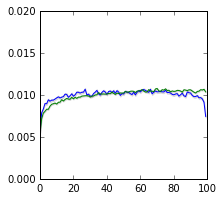

he


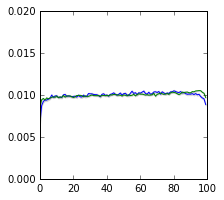

had


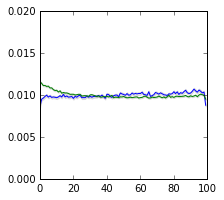

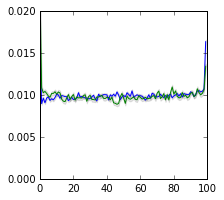

its


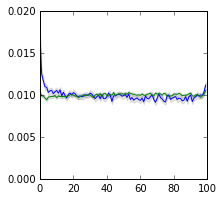

she


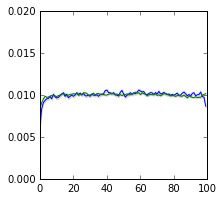

end


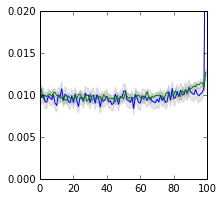

his


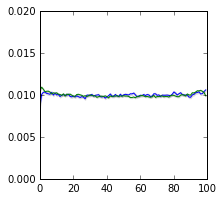

chapter


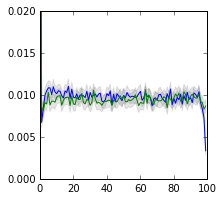

said


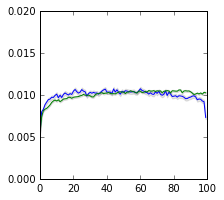

will


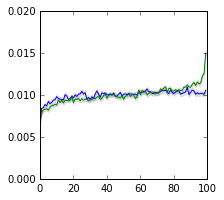

would


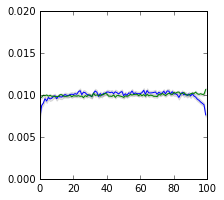

we


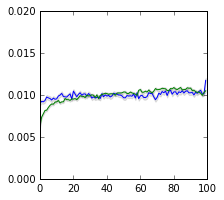

my


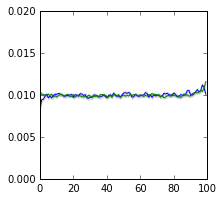

him


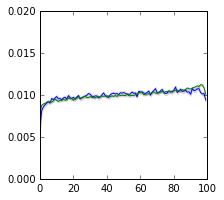

me


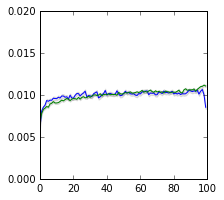

it


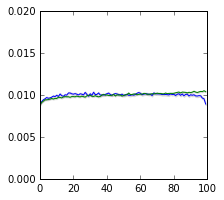

dont


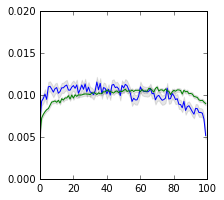

am


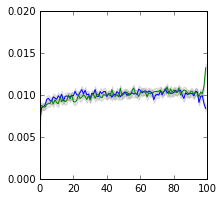

think


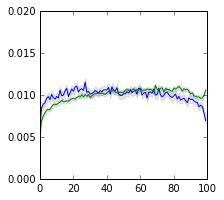

what


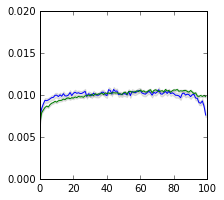

as


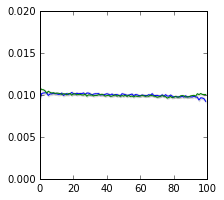

do


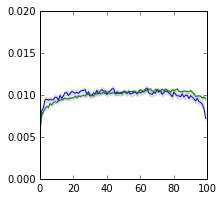

for


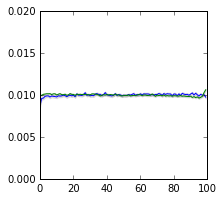

not


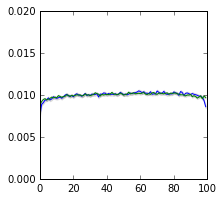

marriage


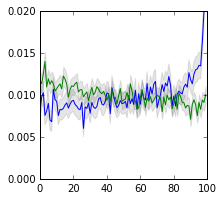

about


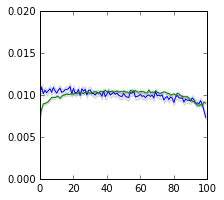

are


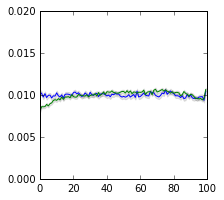

t


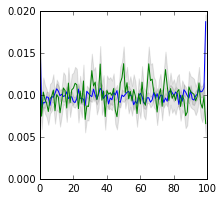

know


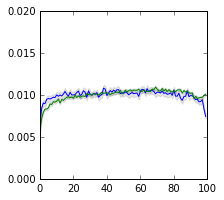

knew


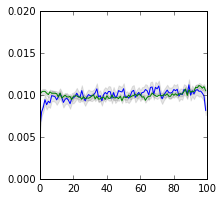

wife


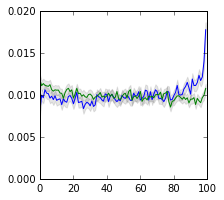

married


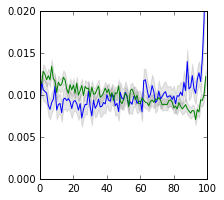

love


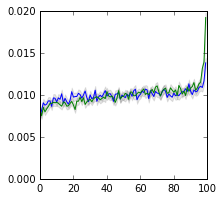

then


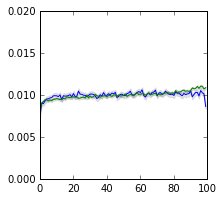

happy


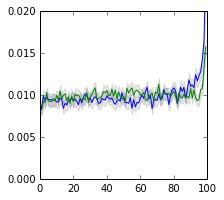

m


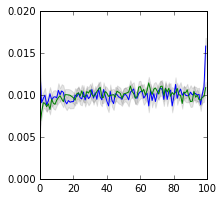

yes


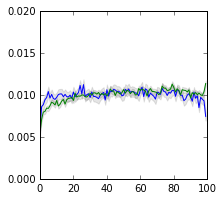

or


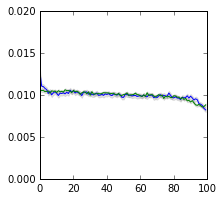

could


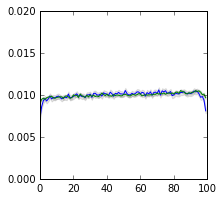

began


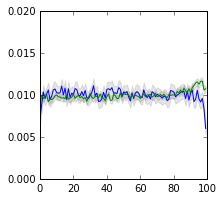

very


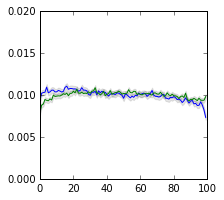

again


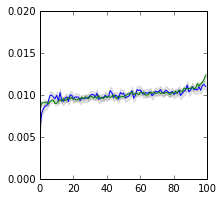

the


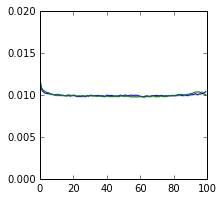

never


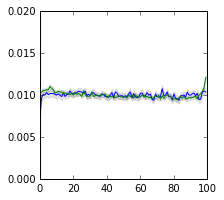

go


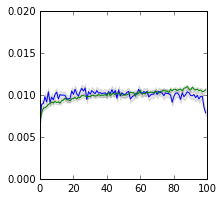

well


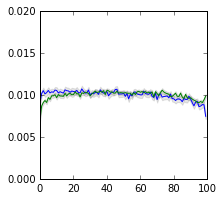

cant


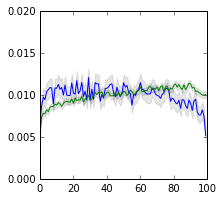

thought


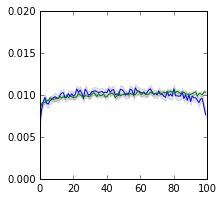

captain


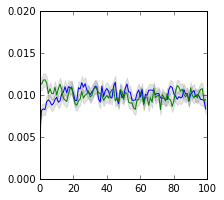

of


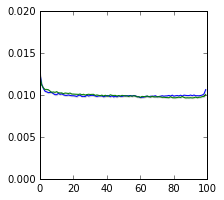

was


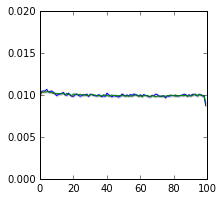

see


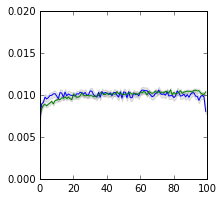

years


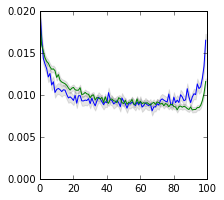

before


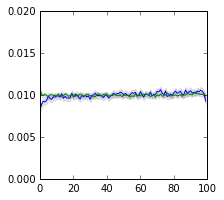

fire


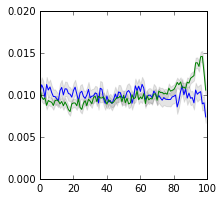

death


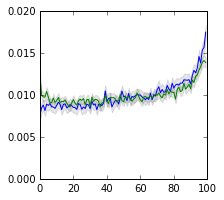

be


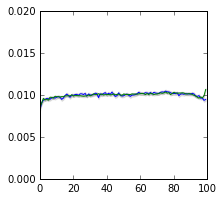

husband


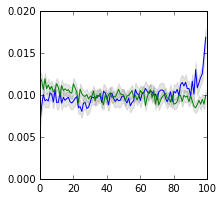

their


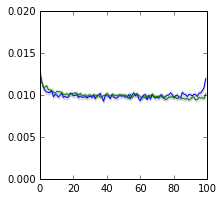

felt


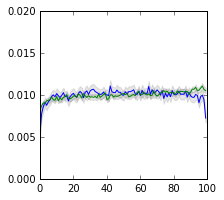

pale


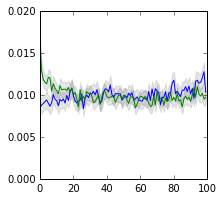

around


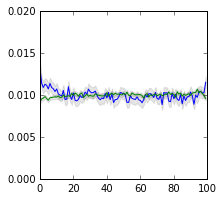

dead


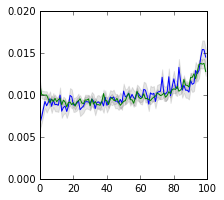

mr


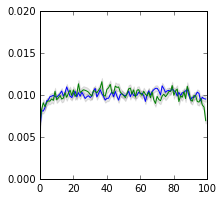

thing


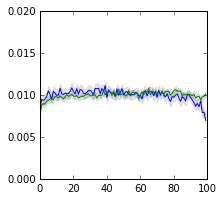

wind


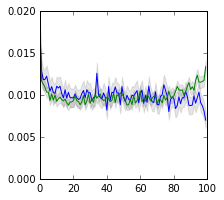

lived


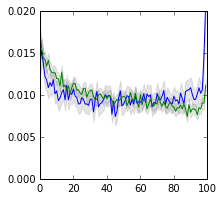

ill


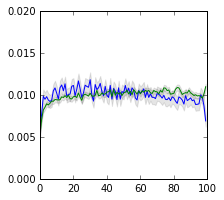

going


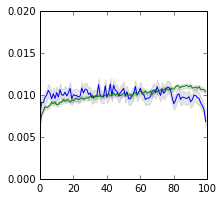

when


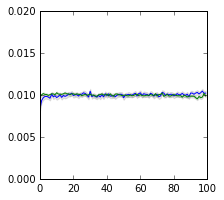

asked


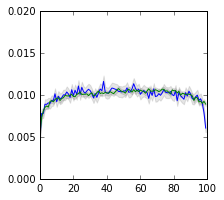

saw


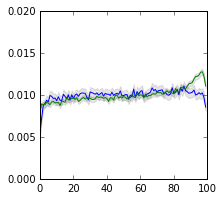

has


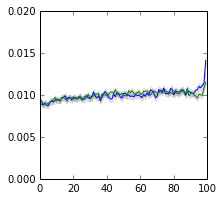

herself


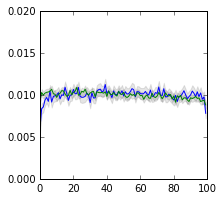

get


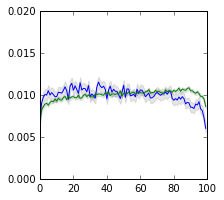

died


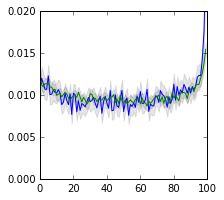

own


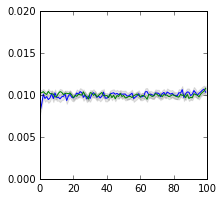

thats


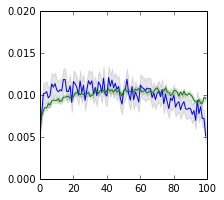

walked


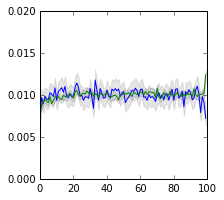

way


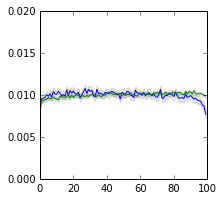

himself


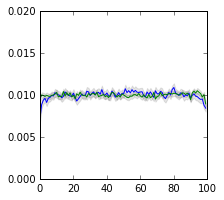

words


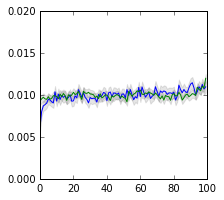

some


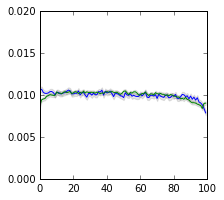

to


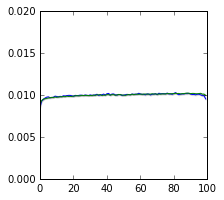

next


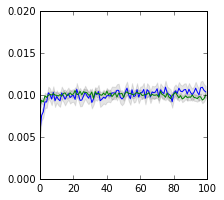

escape


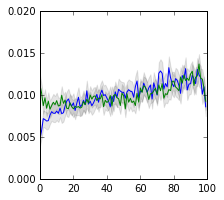

by


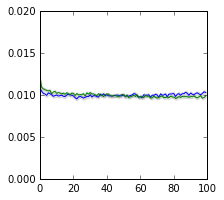

there


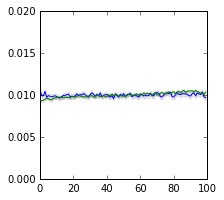

beautiful


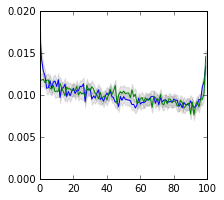

after


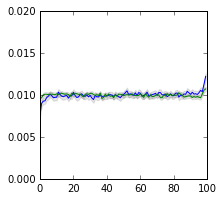

out


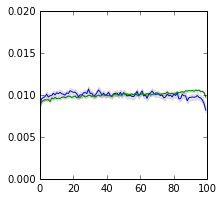

small


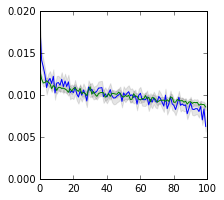

upon


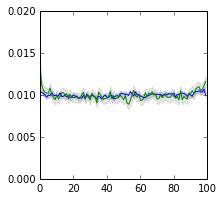

were


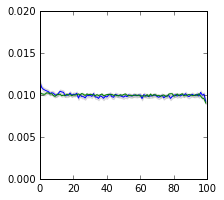

heart


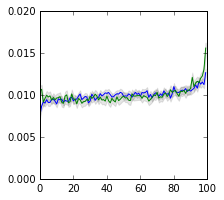

woman


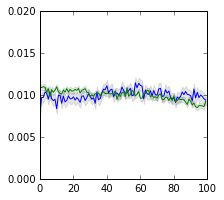

now


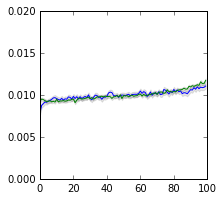

In [46]:
for token in df['token'][:100]:
    plot_movement(token)